# Without Data Processing
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrychowanda/COMP6577/blob/master/COMP6577-6.ipynb)

In [163]:
import pandas as pd

In [164]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/titanic_train.csv

--2025-02-13 05:42:54--  https://raw.githubusercontent.com/andrychowanda/COMP6577/master/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72499 (71K) [text/plain]
Saving to: ‘titanic_train.csv.3’

titanic_train.csv.3 100%[===================>]  70.80K  --.-KB/s    in 0.02s   

2025-02-13 05:42:55 (3.05 MB/s) - ‘titanic_train.csv.3’ saved [72499/72499]



In [165]:
dataTitanic = pd.read_csv("titanic_train.csv")
print(dataTitanic.info())
print(dataTitanic.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB
None
       passenger_id     pclass         age       sibsp       parch  \
count    850.000000  850.0

In [166]:
print(dataTitanic["survived"].value_counts())

survived
0    537
1    313
Name: count, dtype: int64


In [167]:
dataTitanic2 = dataTitanic[["pclass", "age", "sibsp", "parch", "fare", "survived"]]
dataTitanic2 = dataTitanic2.dropna()
print(dataTitanic2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 1 to 849
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    675 non-null    int64  
 1   age       675 non-null    float64
 2   sibsp     675 non-null    int64  
 3   parch     675 non-null    int64  
 4   fare      675 non-null    float64
 5   survived  675 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.9 KB
None


In [168]:
X = dataTitanic2[["pclass", "age", "sibsp", "parch", "fare"]]
Y = dataTitanic2["survived"]

In [169]:
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2,
                                                random_state=42)

In [170]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(XTrain, YTrain)

DecisionTreeClassifier()

In [171]:
YTestPred = model.predict(XTest)
YTrainPred = model.predict(XTrain)
print("Train : " , accuracy_score(YTrain, YTrainPred))
print("Test : ", accuracy_score(YTest, YTestPred))

Train :  0.9722222222222222
Test :  0.6444444444444445


<Axes: xlabel='Predicted', ylabel='Actual'>

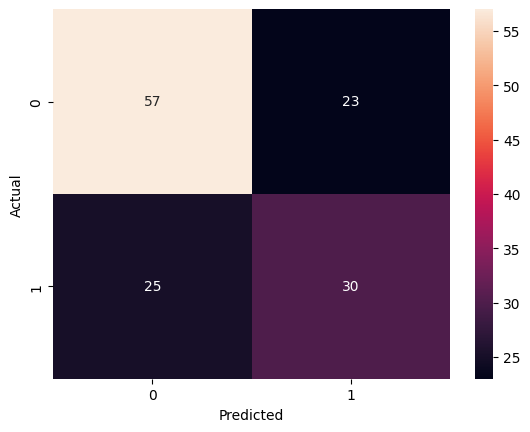

In [172]:
ConfusionMatrixDisplay = pd.crosstab(YTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True)

In [173]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(XTrain, YTrain)

RandomForestClassifier()

<Axes: xlabel='Predicted', ylabel='Actual'>

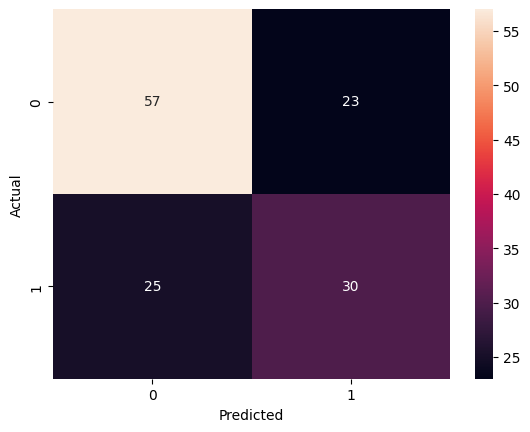

In [174]:
ConfusionMatrixDisplay = pd.crosstab(YTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True)

In [175]:
YTestPred = model.predict(XTest)
YTrainPred = model.predict(XTrain)
print("Train : " , accuracy_score(YTrain, YTrainPred))
print("Test : ", accuracy_score(YTest, YTestPred))

Train :  0.9703703703703703
Test :  0.6962962962962963


#With Data Preprocessing

In [176]:
import pandas as pd

In [177]:
data = pd.read_csv("titanic_train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [178]:
data.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


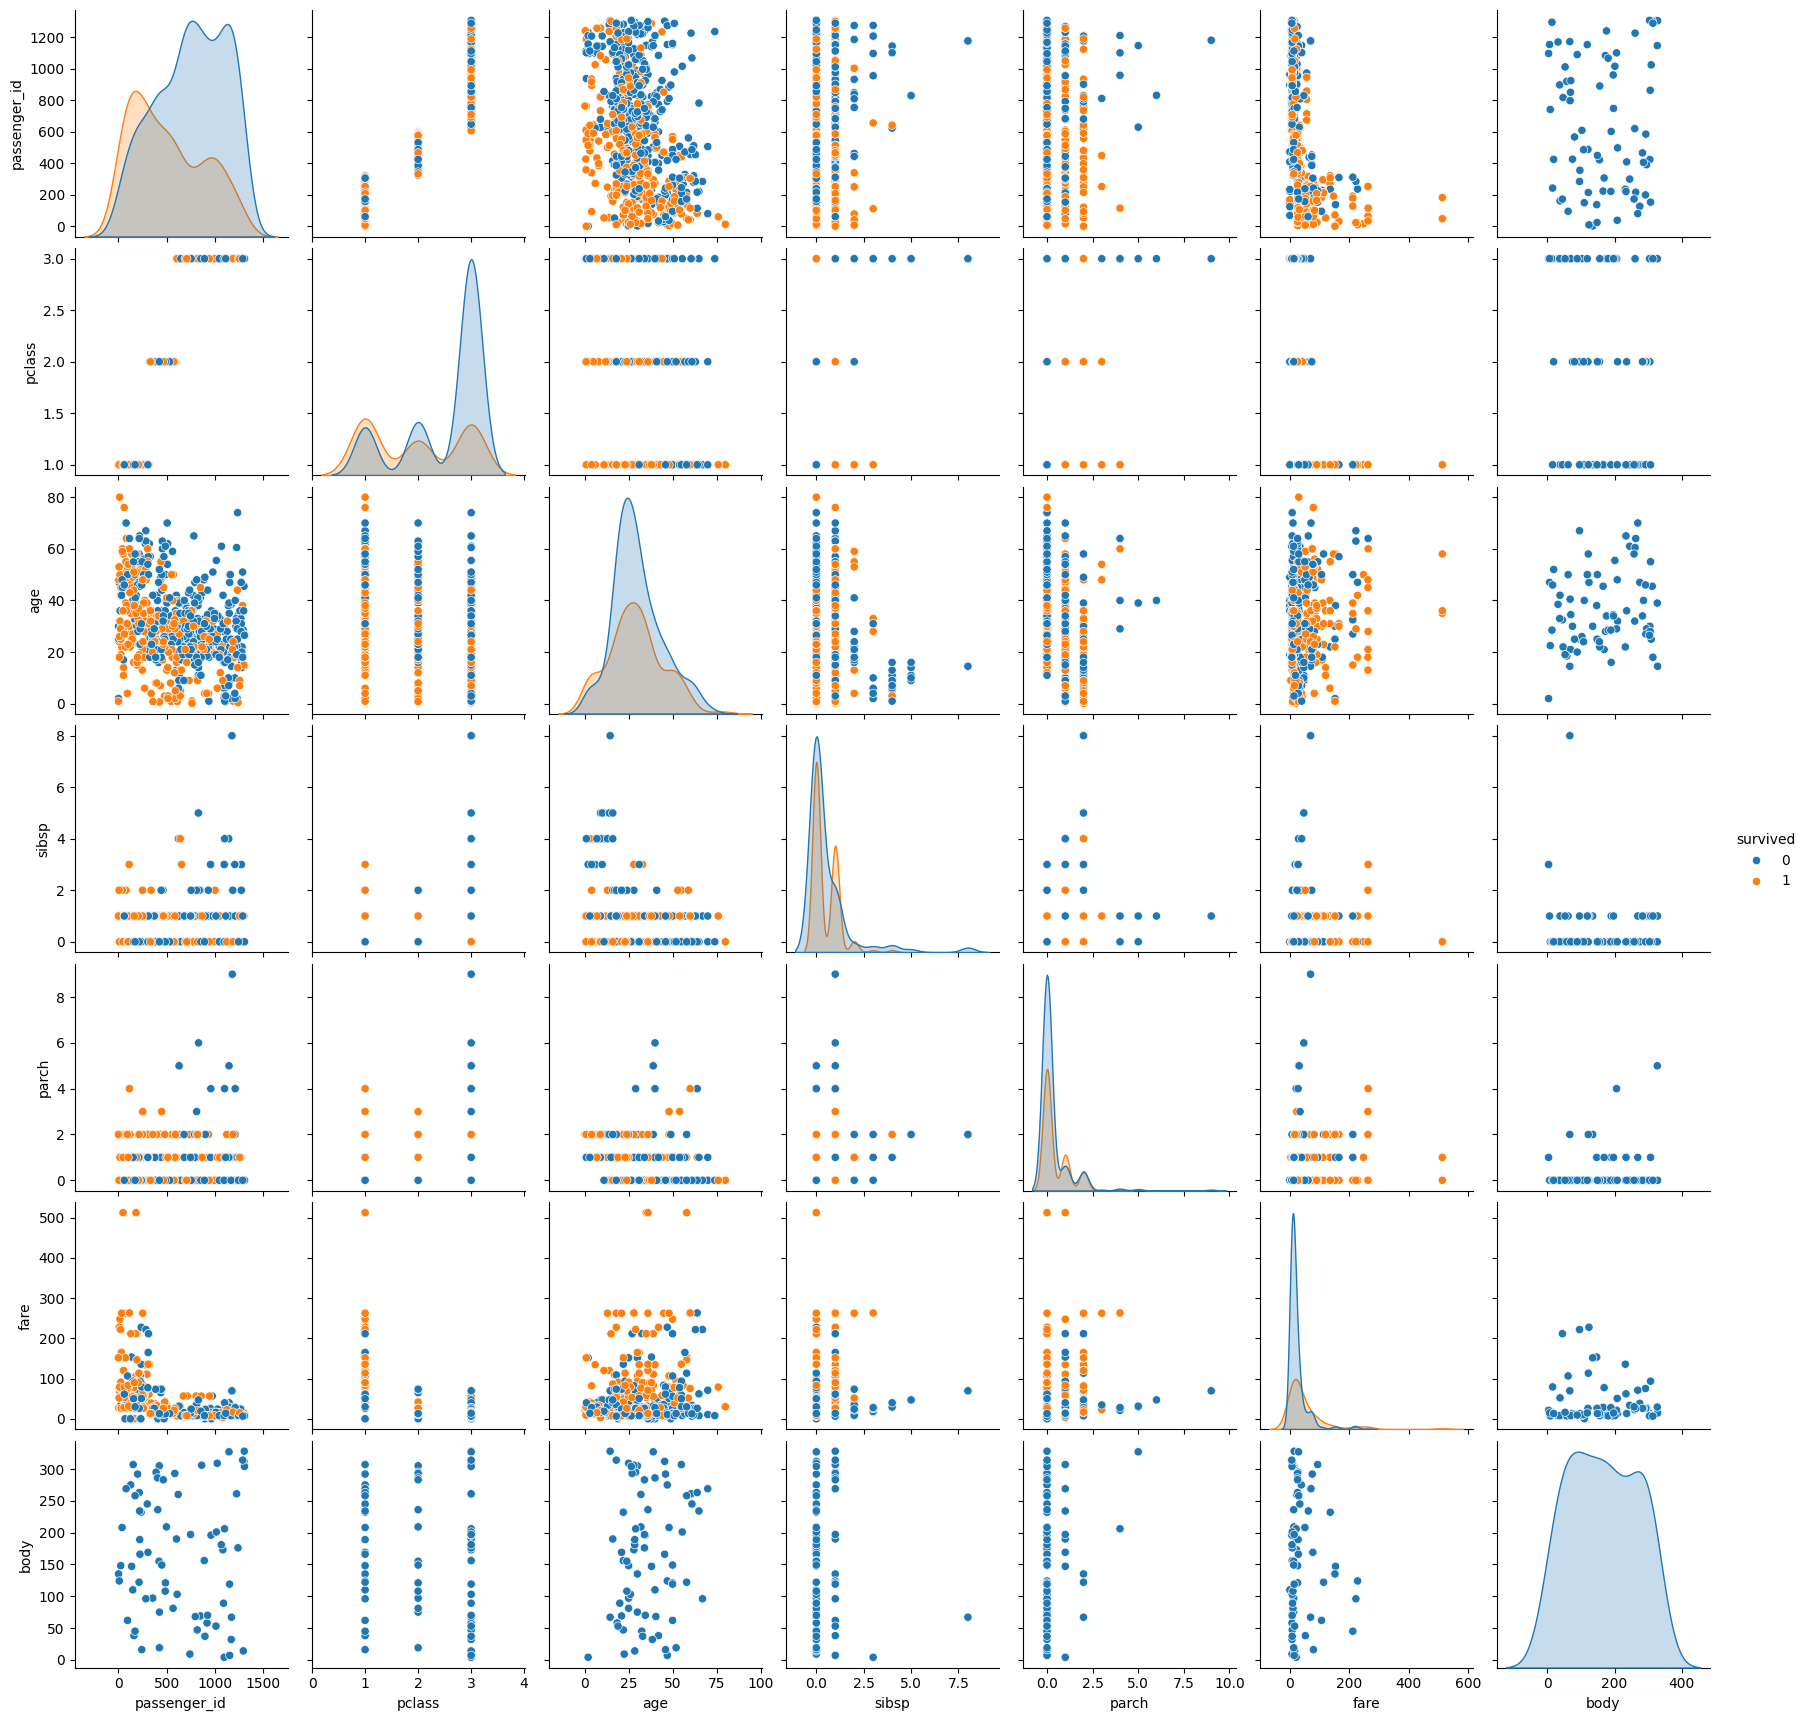

In [179]:
import seaborn as sb

sb.pairplot(data, hue="survived")

<Axes: >

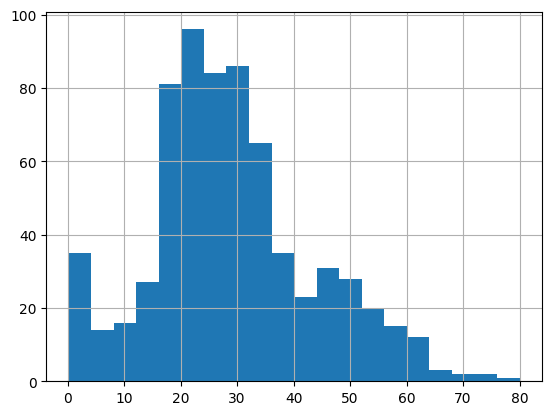

In [180]:
#numerical data
data["age"].hist(bins=20)

<Axes: >

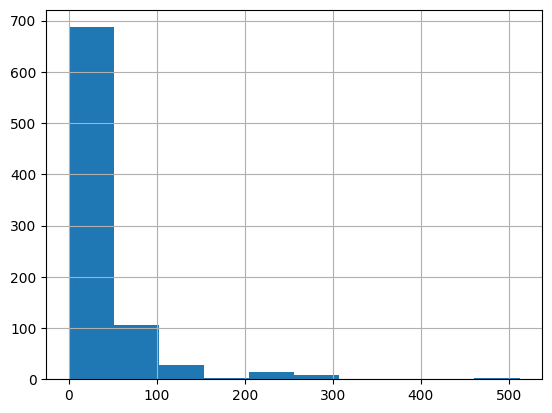

In [181]:
#numerical data
data["fare"].hist(bins=10)

In [182]:
data["pclass"].value_counts()

,count
pclass,
3,478
1,206
2,166


<ipython-input-183-f517af1f314c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data["sex"], palette="viridis")


<Axes: xlabel='count', ylabel='sex'>

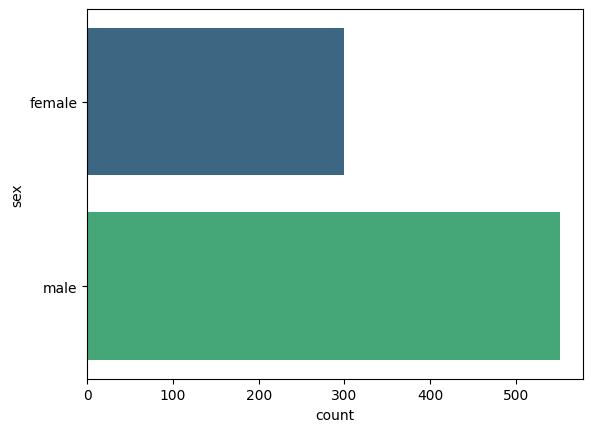

In [183]:
sb.countplot(data["sex"], palette="viridis")

<ipython-input-184-1bc0791dbd55>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data["embarked"], palette="viridis")


<Axes: xlabel='count', ylabel='embarked'>

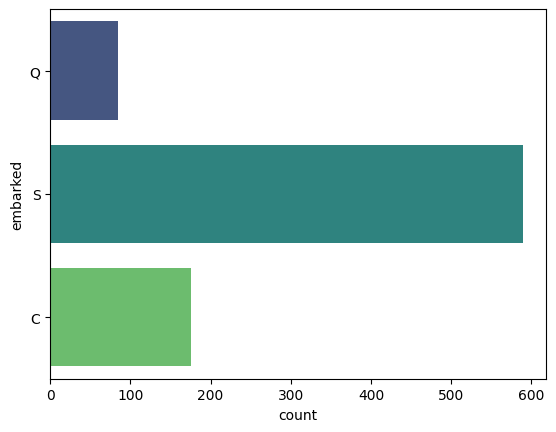

In [184]:
sb.countplot(data["embarked"], palette="viridis")

<Axes: xlabel='sex', ylabel='survived'>

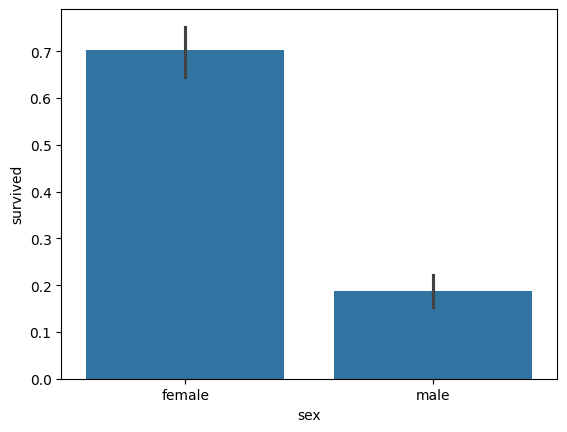

In [185]:
sb.barplot(x="sex", y="survived", data=data)

<Axes: xlabel='pclass', ylabel='survived'>

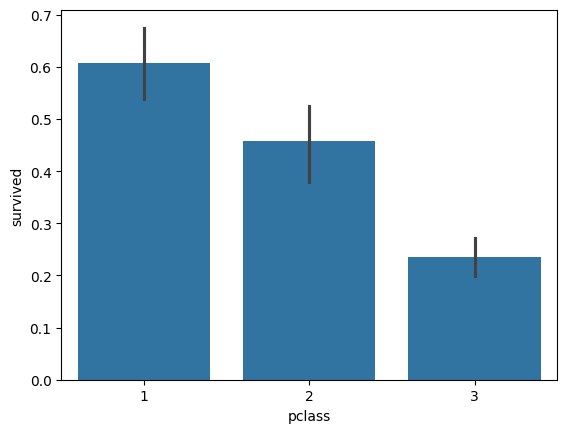

In [186]:
sb.barplot(x="pclass", y="survived", data=data)

<Axes: xlabel='embarked', ylabel='survived'>

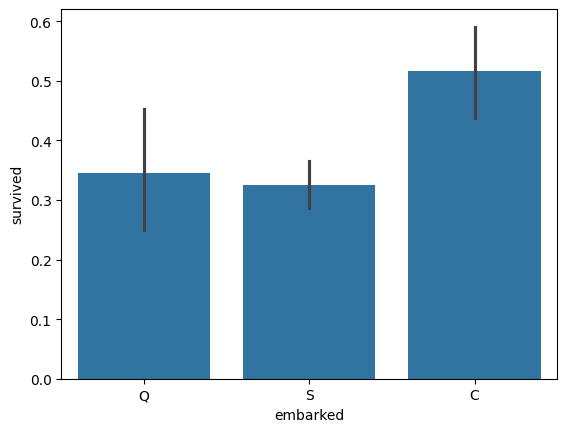

In [187]:
sb.barplot(x="embarked", y="survived", data=data)

In [188]:
#missing values, non numerical data
#missing value - age
data["age"] = data["age"].fillna(data["age"].mean())
#data["age"] = data["age"].fillna(data["age"].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [189]:
#missing value - age
data["fare"] = data["fare"].fillna(data["fare"].mean())
#data["fare"] = data["fare"].fillna(data["fare"].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [190]:
#missing value - cabin
data["cabin"] = data["cabin"].fillna("U")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   cabin         850 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [191]:
#missing value - embarked
data = data.dropna(subset="embarked")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    object 
 4   age           849 non-null    float64
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         849 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 106.1+ KB


In [192]:
print(data["cabin"].value_counts())
data["cabin"] = data["cabin"].map(lambda x: x[0])
print(data["cabin"].value_counts())

cabin
U                  659
B57 B59 B63 B66      4
C22 C26              4
D                    4
B96 B98              4
                  ... 
C104                 1
C49                  1
E52                  1
B79                  1
B37                  1
Name: count, Length: 135, dtype: int64
cabin
U    659
C     62
B     44
D     31
E     24
F     12
A     12
G      4
T      1
Name: count, dtype: int64


<ipython-input-192-06376797666f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cabin"] = data["cabin"].map(lambda x: x[0])


In [193]:
# convert non numerical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["sex"] = encoder.fit_transform(data["sex"])
data["embarked"] = encoder.fit_transform(data["embarked"])
data["cabin"] = encoder.fit_transform(data["cabin"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  849 non-null    int64  
 1   pclass        849 non-null    int64  
 2   name          849 non-null    object 
 3   sex           849 non-null    int64  
 4   age           849 non-null    float64
 5   sibsp         849 non-null    int64  
 6   parch         849 non-null    int64  
 7   ticket        849 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         849 non-null    int64  
 10  embarked      849 non-null    int64  
 11  boat          307 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      849 non-null    int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 106.1+ KB


<ipython-input-193-f06df1e162bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sex"] = encoder.fit_transform(data["sex"])
<ipython-input-193-f06df1e162bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["embarked"] = encoder.fit_transform(data["embarked"])
<ipython-input-193-f06df1e162bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

<Axes: >

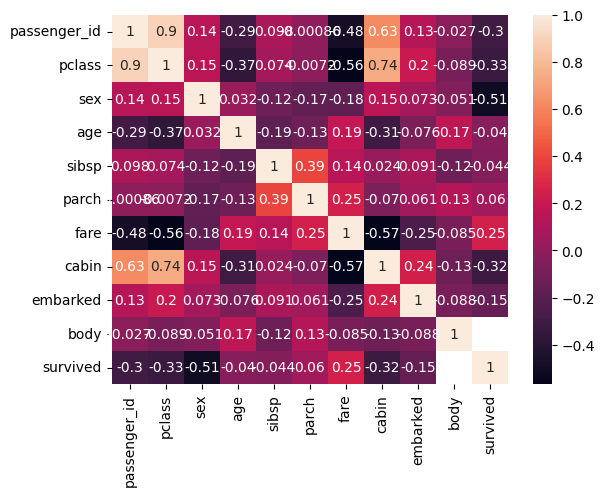

In [194]:
dataCorr = data.corr(numeric_only=True)
sb.heatmap(dataCorr, annot=True)

In [195]:
X = data[["pclass", "sex", "fare", "cabin"]]
Y = data["survived"]

In [196]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2,
                                                random_state=42)

In [197]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(XTrain, YTrain)

DecisionTreeClassifier()

In [198]:
YTestPred = model.predict(XTest)
YTrainPred = model.predict(XTrain)
print("Train : " , accuracy_score(YTrain, YTrainPred))
print("Test : ", accuracy_score(YTest, YTestPred))

Train :  0.9234167893961709
Test :  0.7705882352941177


<Axes: xlabel='Predicted', ylabel='Actual'>

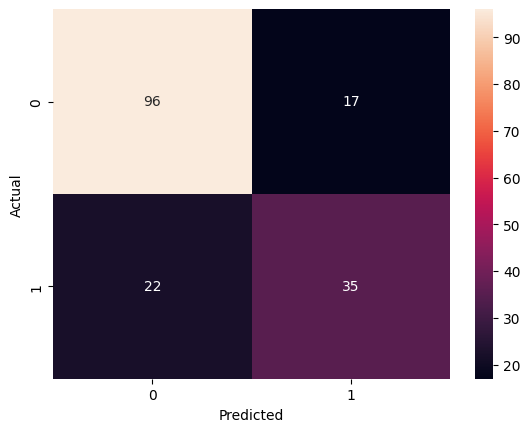

In [199]:
ConfusionMatrixDisplay = pd.crosstab(YTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True)

In [200]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(XTrain, YTrain)

RandomForestClassifier()

In [201]:
YTestPred = model.predict(XTest)
YTrainPred = model.predict(XTrain)
print("Train : " , accuracy_score(YTrain, YTrainPred))
print("Test : ", accuracy_score(YTest, YTestPred))

Train :  0.9234167893961709
Test :  0.7588235294117647


<Axes: xlabel='Predicted', ylabel='Actual'>

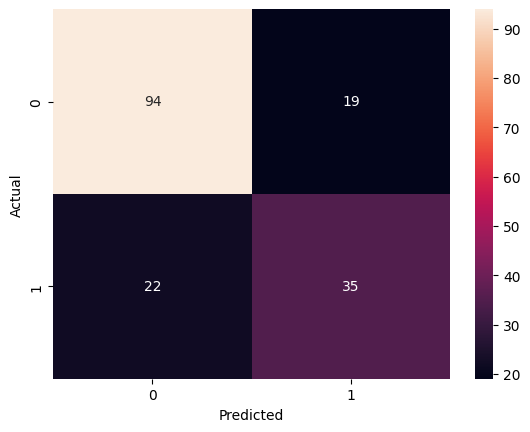

In [202]:
ConfusionMatrixDisplay = pd.crosstab(YTest, YTestPred,
                                    rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(ConfusionMatrixDisplay, annot=True)